# Indian Cuisine Analysis
 
## Content
Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.

This dataset consists of information about various Indian dishes, their ingredients, their place of origin, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import the dataset
indianfood = pd.read_csv("indian_food.csv")

## Column Description
* **name** : name of the dish

* **ingredients** : main ingredients used

* **diet** : type of diet - either vegetarian or non vegetarian

* **prep_time** : preparation time

* **cook_time** : cooking time

* **flavor_profile** : flavor profile includes whether the dish is spicy, sweet, bitter, etc

* **course** : course of meal - starter, main course, dessert, etc

* **state** : state where the dish is famous or is originated

* **region** : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.

In [3]:
indianfood.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
indianfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
indianfood.shape

(255, 9)

In [6]:
indianfood.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [7]:
# Missing values count in the dataset
indianfood.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [8]:
indianfood = indianfood.dropna()
indianfood.shape

(254, 9)

Text(0.5, 1.0, 'Regional count of dishes')

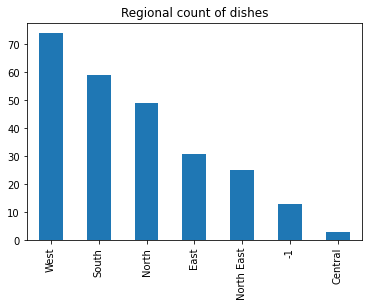

In [9]:
indianfood['region'].value_counts().plot(kind='bar')
plt.title("Regional count of dishes")

NameError: name 'Plt' is not defined

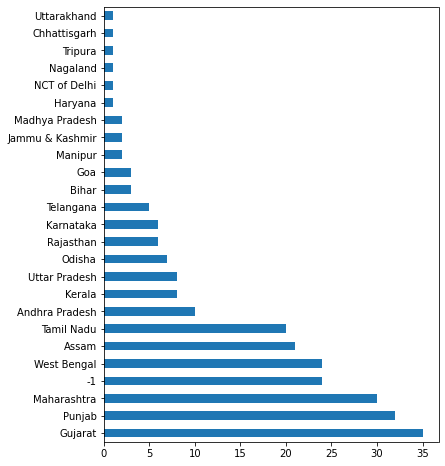

In [10]:
indianfood['state'].value_counts().plot(kind="barh", figsize = (6,8))
Plt.title("Statewise count of dishes")

Text(0.5, 1.0, 'Flavors count')

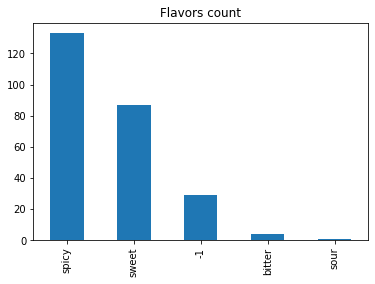

In [11]:
indianfood.flavor_profile.value_counts().plot(kind = "bar")
plt.title("Flavors count")

### Veg/ Non-Veg Diet Percent

Text(0.5, 1.0, 'Veg/ Non-Veg Diet Percent')

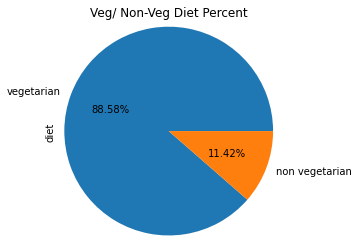

In [12]:
indianfood.diet.value_counts().plot(kind = 'pie' , autopct = '%0.2f%%' , radius = 1.2)
plt.title("Veg/ Non-Veg Diet Percent")

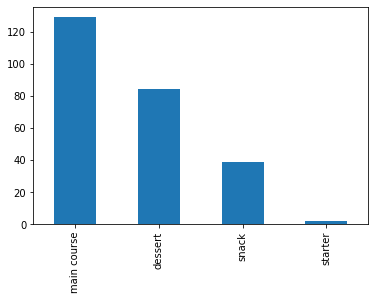

In [13]:
indianfood.course.value_counts().plot(kind = 'bar')

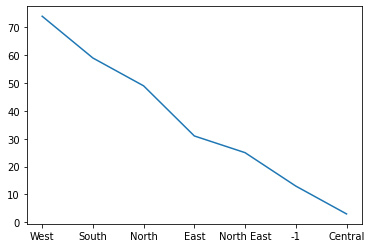

In [14]:
indianfood.region.value_counts().plot()

In [15]:
piv_tab = indianfood.pivot_table(values='name' , index = ['region'] , columns = "course" , aggfunc = 'count')
piv_tab

course,dessert,main course,snack,starter
region,,,,
-1,5.0,4.0,4.0,NaN
Central,1.0,1.0,1.0,NaN
East,21.0,10.0,NaN,NaN
North,9.0,37.0,1.0,2.0
North East,7.0,18.0,NaN,NaN
South,18.0,31.0,10.0,NaN
West,23.0,28.0,23.0,NaN


Text(0.5, 1.0, 'Flavor profile')

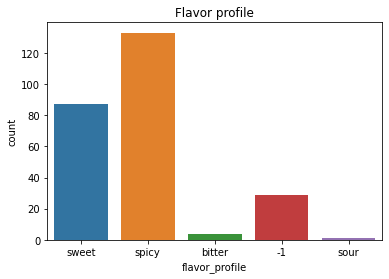

In [38]:
sns.countplot(x=indianfood['flavor_profile'])
plt.title("Flavor profile")

Text(0.5, 1.0, 'Region vs course')

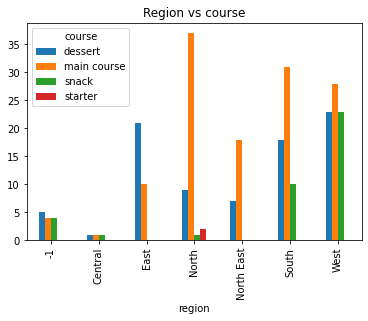

In [16]:
piv_tab.plot(kind ="bar")
plt.title('Region vs course')

In [17]:
indianfood.flavor_profile.value_counts()

spicy     133
sweet      87
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [18]:
region_course = indianfood.pivot_table(values = 'name' , 
                       index = ['region'],
                       columns = 'flavor_profile',
                       aggfunc = 'count')

Text(0.5, 1.0, 'Region vs Flavor-profile')

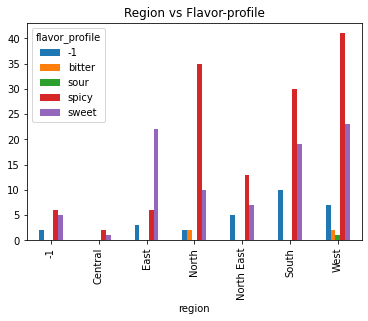

In [19]:
region_course.plot(kind = 'bar')
plt.title("Region vs Flavor-profile")

Text(0.5, 1.0, 'Number of courses count')

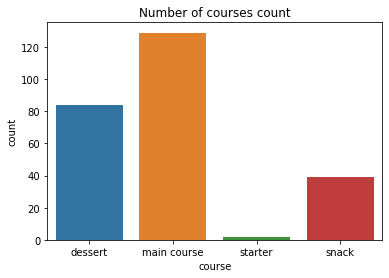

In [20]:
sns.countplot(x=indianfood['course'])
plt.title("Number of courses count")

Text(0.5, 1.0, 'Regional variety count')

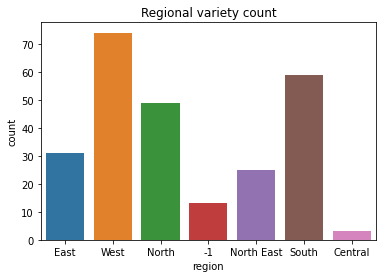

In [21]:
sns.countplot(x = indianfood.region)
plt.title('Regional variety count')

Text(0.5, 1.0, 'Count of dishes per state')

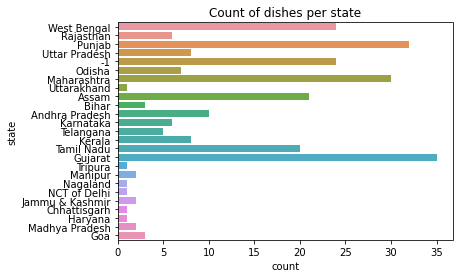

In [37]:
sns.countplot(y=indianfood['state'] , )
plt.title("Count of dishes per state")

In [25]:
statelist = indianfood[indianfood['state']=='West Bengal'].reset_index(drop=True)
statelist.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
2,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
3,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
4,Cham cham,"Flour, cream, sugar, saffron, lemon juice, coc...",vegetarian,40,60,sweet,dessert,West Bengal,East


### Dishes which has one of the ingredients as Ghee

In [26]:
indianfood.name[indianfood.ingredients.str.contains('ghee')]

1             Boondi
2     Gajar ka halwa
3             Ghevar
4        Gulab jamun
7         Kaju katli
10             Laddu
12         Nankhatai
16            Sheera
18       Sohan halwa
19       Sohan papdi
20     Chhena jalebi
25          Ledikeni
27           Malapua
28          Mihidana
30            Pantua
36         Adhirasam
37           Ariselu
38      Bandar laddu
42           Gavvalu
45        Mysore pak
46    Obbattu holige
49            Pongal
50      Pootharekulu
61       Shankarpali
63        Sutar feni
Name: name, dtype: object

### Dishes which consumes maximum time to make

In [30]:
indianfood['total_time']  = indianfood.prep_time + indianfood.cook_time

In [31]:
indianfood.sort_values(by = 'total_time' , ascending=False).head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West,730
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North,620
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,-1,main course,Kerala,South,535
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East,510
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,-1,South,450
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360,90,spicy,snack,-1,South,450
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,spicy,snack,-1,South,450
48,Poornalu,"Chana dal, jaggery",vegetarian,240,60,sweet,dessert,Andhra Pradesh,South,300
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240,45,sweet,dessert,Manipur,North East,285
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,spicy,main course,Punjab,North,270


### Dishes which has maximum ingredients used: 

In [33]:
my_list = pd.DataFrame((indianfood.ingredients.str.split(pat=',' , expand = True)))
my_list.head()

,0,1,2,3,4,5,6,7,8,9
0,Maida flour,yogurt,oil,sugar,None,None,None,None,None,None
1,Gram flour,ghee,sugar,None,None,None,None,None,None,None
2,Carrots,milk,sugar,ghee,cashews,raisins,None,None,None,None
3,Flour,ghee,kewra,milk,clarified butter,sugar,almonds,pistachio,saffron,green cardamom
4,Milk powder,plain flour,baking powder,ghee,milk,sugar,water,rose water,None,None


In [34]:
my_list = my_list.dropna()
my_list

,0,1,2,3,4,5,6,7,8,9
3,Flour,ghee,kewra,milk,clarified butter,sugar,almonds,pistachio,saffron,green cardamom


Hence we can see that there is only one item which uses 9 ingridients i.e., `Ghevar`

### Count of veg/non-veg dishes count by states

In [35]:
menu_card = indianfood.groupby(['state','diet','flavor_profile'] , as_index= False)['name'].count()
menu_card.head(50)

,state,diet,flavor_profile,name
0,-1,vegetarian,-1,4
1,-1,vegetarian,spicy,14
2,-1,vegetarian,sweet,6
3,Andhra Pradesh,vegetarian,spicy,2
4,Andhra Pradesh,vegetarian,sweet,8
5,Assam,non vegetarian,-1,1
6,Assam,non vegetarian,spicy,9
7,Assam,vegetarian,-1,3
8,Assam,vegetarian,spicy,2
9,Assam,vegetarian,sweet,6
